In [37]:
# Importar las liberías necesarias

# Pandas
import pandas as pd

# NLTK
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

# NumPy
import numpy as np

# WordCLoud
from wordcloud import WordCloud
from PIL import Image

from collections import Counter
import matplotlib.pyplot as plt

In [16]:
# Lectura del csv
stop_words_en = stopwords.words('english')
stop_words_en.extend(["€", ",", ".", ";", ":", "%", "'", "=", "[", "]", "/", "<", ".-", "e.g", "i.e", "~", "--", "without"])
stop_words_en.extend(["``", "(", ")", "this", "the", "that", "?", "!", "≤", "™", ">", "≥/", "≥", "-", "$" , "’", "-", "  ", "&", "us"])
stop_words_en.extend(["would"])

df = pd.read_csv('The_Reserve_PPR.csv')
df.head(2)

#print(df['Review Text'].isnull().sum()) # comprobar que no hay filas vacías de la columna. En este caso es 9
df.dropna(subset=['Review Text'], axis=0, inplace=True)

In [17]:
#stop_words_en

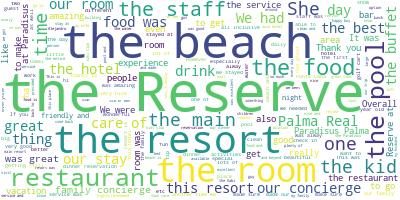

In [18]:
# Sacamos la frecuencia de las palabras. Como argumento le metemos un "list"
wordcloud = WordCloud(background_color="white", stopwords=stop_words_en).generate(''.join(df['Review Text']))
wordcloud.to_image() # Imprimimos el wordcloud

In [19]:
#print(df['Review Text'].isnull().sum()) # Ya no hay filas vacías

In [20]:
# Función para obtener los N_gramas de un texto
def find_ngrams(input_list, n):
    return list(zip(*[input_list[i:] for i in range(n)]))

In [21]:
# Tokenizamos y eliminamos las stop words
df["Review Text"] = df["Review Text"].astype("str") # Convertimos la columna en una string/object

df["Review Text"]= df["Review Text"].apply(lambda x: word_tokenize(x.lower())) # Tokeniza y pasa todo a lower case.
# Elimina las stopwords
df['Review Text'] = df['Review Text'].apply(lambda x: 
                                            ' '.join(word for word in x if word not in (stop_words_en)))

#df['Review Text'][:2]

In [22]:
#len(df['Review Text']) ## 1101
df['Review Text'] = df['Review Text'].astype(str)

lemmatizer = nltk.stem.WordNetLemmatizer()
# Lematizar los textos
def lemmatize_text(text):
    return lemmatizer.lemmatize(text)

df['Review Text'] = df["Review Text"].apply(lemmatize_text) # Si no se quiere lemmatizar, comentar esta línea
print(df['Review Text'][:2])

df["tokens"] = df["Review Text"].map(lambda x: word_tokenize(x))
df["bigramas"] = df["Review Text"].map(lambda x: find_ngrams(x.split(" "), 2))
df["trigramas"] = df["Review Text"].map(lambda x: find_ngrams(x.split(" "), 3))
col_drop = ["Country", "Source", "Language", "Management Response", "Replied", "Tags", "Cases", "Notes", "Rating Scale"]
df.drop(col_drop, axis=1, inplace=True)
df.head(2)

0    elegant high class minute walk sure feels like...
1    awesome time resort well maintained staff frie...
Name: Review Text, dtype: object


,PMS ID,Hotel Name,GRI™,Reviewer,Published Date,Review Rating,Review Score,Classification,Review Title,Review Text,tokens,bigramas,trigramas
0,5911,The Reserve at Paradisus Palma Real,92.60%,Borlyn,02/06/2019,5.0,100.00%,Positive,Very elegant and high class. The...,elegant high class minute walk sure feels like...,"[elegant, high, class, minute, walk, sure, fee...","[(elegant, high), (high, class), (class, minut...","[(elegant, high, class), (high, class, minute)..."
1,5911,The Reserve at Paradisus Palma Real,92.60%,DRaj2113,02/06/2019,5.0,100.00%,Positive,Family vacation,awesome time resort well maintained staff frie...,"[awesome, time, resort, well, maintained, staf...","[(awesome, time), (time, resort), (resort, wel...","[(awesome, time, resort), (time, resort, well)..."


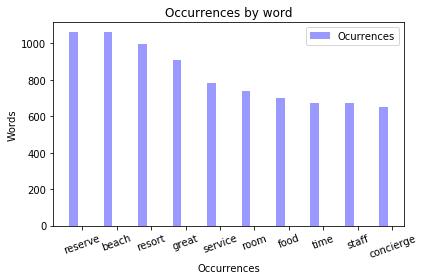

In [48]:
listatodostokens=[]
for t in df["tokens"]:
    for r in t:
        listatodostokens.append(r)
#print("Cuenta de los tokens de todos los reviews")#
#print(Counter(listatodostokens).most_common(50))

data = Counter(listatodostokens).most_common(10)
n_groups = len(data)

values_tokens = [x[1] for x in data]
tokens = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, values_tokens, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Occurrences by word')
plt.xticks(index + bar_width, tokens, rotation=20)
plt.legend()

plt.tight_layout()
plt.show()

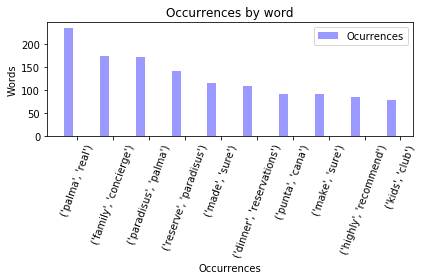

In [49]:
listatodosbigrm=[]
for t in df["bigramas"]:
    for r in t:
        listatodosbigrm.append(r)
#print("Cuenta de los bigramas de todos los reviews")
#print(Counter(listatodosbigrm).most_common(50))

data = Counter(listatodosbigrm).most_common(10)
n_groups = len(data)

values_tokens = [x[1] for x in data]
tokens = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, values_tokens, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Occurrences by word')
plt.xticks(index + bar_width, tokens, rotation=70)
plt.legend()

plt.tight_layout()
plt.show()

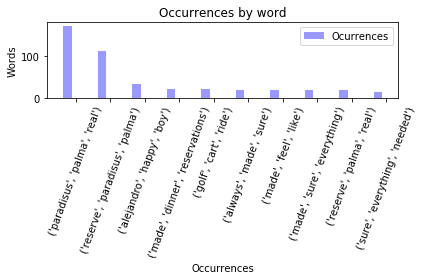

In [50]:
listatodostrigrm=[]
for t in df["trigramas"]:
    for r in t:
        listatodostrigrm.append(r)
#print("Cuenta de los trigramas de todos los reviews")
#print(Counter(listatodostrigrm).most_common(50))

data = Counter(listatodostrigrm).most_common(10)
n_groups = len(data)

values_tokens = [x[1] for x in data]
tokens = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, values_tokens, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Occurrences by word')
plt.xticks(index + bar_width, tokens, rotation=70)
plt.legend()

plt.tight_layout()
plt.show()